# Convolutional Neural Networks

**Author:** Miguel Carrasco Belmar  
<br>
Have you ever counted how many times you pick up your phone each day? It’s estimated that an average person unlocks their phone 110 to 150 times per day. Each time you unlock your phone using Face ID or facial recognition, you’re actually using a Convolutional Neural Network, over 100 times a day! Convolutional Neural Networks (CNNs) are a type of neural network widely used in Artificial Intelligence (AI), especially in computer vision tasks such as image classification, object detection, and image segmentation.
<p align="center">
  <img src="images/banner.png" alt="CNN feature banner">
  
</p>

## Background: What are Neural Networks
A Neural Network is a computational model within the domain of Deep Learning, a subfield of Machine Learning.
It is composed of interconnected processing units, known as artificial neurons, organized in multiple layers that collectively learn to approximate complex functions.
This architecture is inspired by the structure and functioning of the human brain. Each neuron receives input, processes it through a mathematical function (typically involving weighted summations and activation functions), and transmits the output to subsequent neurons.
Through an iterative training process, the network learns to adjust its internal parameters (weights and biases) to minimize prediction error.
Once trained, the network can recognize patterns in data and make predictions in diverse categories such as image recognition, speech processing, and natural language understanding.

## How do Neural Networks work?
Artificial neural networks are designed to emulate the way biological neurons transmit and process signals.
They are composed of distinct layers, each performing a specific function in the learning process:
<p align="center">
  <img src="images/layers.png" alt="layers" width="600">
</p>

**Input Layer:**
This layer receives raw data from the external environment. Each input node corresponds to one feature of the dataset (for example, pixel intensity in an image). The input layer transmits this information to subsequent layers without modification.

**Hidden Layers:**
These layers perform the majority of the computation. They transform the input data into increasingly abstract representations through weighted connections and activation functions. A deep neural network may contain numerous hidden layers, each responsible for capturing progressively higher-level features.

**Output Layer:**
The final layer produces the network’s output, such as a class label or probability distribution.
In binary classification tasks, this layer may consist of a single neuron that outputs a value between 0 and 1.
In contrast, multi-class classification problems require multiple output neurons, each representing a distinct class.

Depending on how data propagates through the layers, neural networks can assume various architectures. Among these, Convolutional Neural Networks are particularly effective for processing visual and spatial data.

## What Are Convolutional Neural Networks (CNNs)
Convolutional Neural Networks (CNNs) are a specialized class of neural networks primarily designed to process and extract meaningful features from grid-like data structures, such as images or videos. In visual data, spatial patterns, for example, edges, textures, and shapes, play a crucial role in understanding the content. CNNs are particularly effective in capturing these spatial hierarchies, which makes them the foundation of most computer vision applications today.

<p align="center">
  <img src="images/cnns.PNG" alt="cnns">
</p>

A CNN is formed by multiple layers that work together to transform raw pixel data into abstract, high-level representations. The key layers that define the architecture of a CNN are:

**1.- Input Layer:** This layer receives the raw image data, typically represented as a three-dimensional matrix of pixel intensity values corresponding to the image’s height, width, and color channels (RGB). The input layer does not perform any computation; it simply feeds the pixel values to the next layer.

**2.- Convolutional Layers:** This is the core building block of a CNN. It applies small, learnable filters (called kernels) that slide over the input image to detect localized features such as edges, corners, or gradients. Each filter produces a feature map that highlights where specific patterns occur in the image. By stacking multiple convolutional layers, the network learns hierarchical featuresfrom simple edges in early layers to more complex structures or objects in deeper ones.


**3.- Activation Layers:** After each convolution operation, an activation function introduces non-linearity into the model, enabling it to learn complex patterns. The most common activation function is the Rectified Linear Unit (ReLU), which replaces all negative values with zero. This helps the CNN converge faster (i.e., find optimal parameters efficiently) and prevents the vanishing gradient problem, a common issue where gradients become too small for effective learning in deep networks.


**4.- Pooling Layers:** They reduce the spatial size of the feature maps while retaining the most significant information. The most widely used pooling method is Max Pooling, which selects the maximum value from each local region (for example, a 2×2 window). This process reduces computational cost and makes the CNN more robust to variations and distortions in the input image.


**5.- Fully Connected Layers:** After several convolutional and pooling layers, the extracted features are flattened into a one-dimensional vector and passed through one or more fully connected (dense) layers. These layers combine the learned features to make high-level inferences and form the basis for the final classification.


**6.- Output Layer:** This is the final layer of the CNN that produces the prediction. For instance, in a multi-class classification task, the Softmax activation function is commonly used to convert the output into a probability distribution across all possible categories (e.g., cat = 0.85, dog = 0.10, car = 0.05).

<br><br>
To better understand these concepts, lets walk through an example. We have the following input image:
<p align="center">
  <img src="images/Ganesh.jpg" width="400"/>
</p><br>

We will apply convolution, activation, and pooling to the grayscale version of the image. First, we need to import the required libraries for numerical computation, image processing, and visualization.

In [ ]:
# Import the necesseray libraries
import numpy as np # used for numerical operations (arrays, matrices, math).
import tensorflow as tf # deep learning library for building and training neural networks.
import matplotlib.pyplot as plt # module for creating plots and visualizations.
from itertools import product #used to create all possible combinations of elements (Cartesian product).

# Set visualization parameters
plt.rc('figure', autolayout=True) # Automatically adjust layouts (avoids overlapping text or labels).
plt.rc('image', cmap='magma') # Sets the default colormap for images to 'magma' (a purple–yellow gradient).

Next, we define the kernel (or filter). This is a small matrix used in the convolution process to detect features such as edges or gradients. In this case, we will use a 3×3 edge detection kernel.

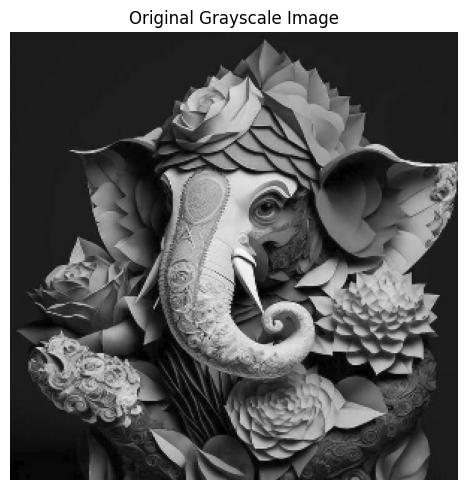

In [ ]:
# Define the kernel for edge detection
kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
])

# Load the image
image = tf.io.read_file('/Ganesh.jpg')
image = tf.io.decode_jpeg(image, channels=1)      # Convert to grayscale
image = tf.image.resize(image, size=[300, 300])   # Resize to 300x300 pixels

# Plot the original image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Grayscale Image')
plt.show()


We can now view our original input image in grayscale. Before applying convolution, we need to convert the image into a 4D tensor with the shape (batch, height, width, channels). We also need to normalize pixel values to the range [0,1] for numerical stability.

In [ ]:
# Convert image to float values and expand dimensions
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)

# Reshape and cast the kernel
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)


Now we are ready to apply the convolution layer. This layer slides the kernel over the image to detect local patterns such as edges and corners. Each position produces a weighted sum that forms the feature map.

Text(0.5, 1.0, 'Convolution')

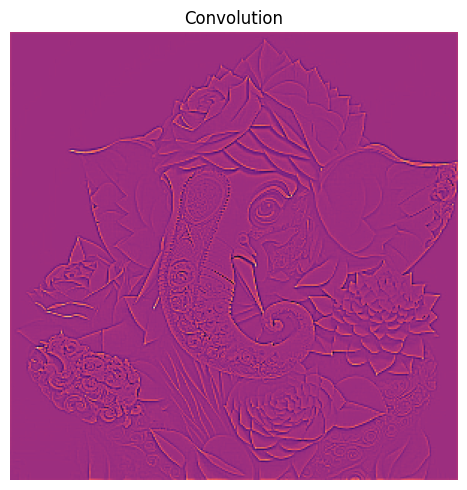

In [ ]:
# Define the convolution operation
conv_fn = tf.nn.conv2d

# Apply convolution to the image
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME',
)

# Plot the convolved image
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Convolution')


In the output, we can see that the convolution layer effectively highlights boundaries and fine details. Bright regions correspond to strong edge responses—areas where pixel intensity changes sharply. Next, we apply the activation layer, which introduces non-linearity. We will use ReLU (which replaces all negative values with zero). This helps the CNN focus only on significant patterns.

Text(0.5, 1.0, 'Activation')

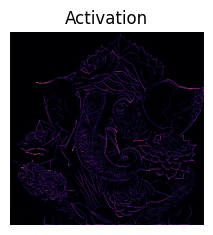

In [ ]:
# Define the activation function
relu_fn = tf.nn.relu

# Apply ReLU activation
image_detect = relu_fn(image_filter)

# Plot the activated image
plt.subplot(1, 3, 2)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Activation')


The ReLU layer suppresses weak or irrelevant responses, enhancing the clarity of edges and structural patterns detected by the convolution layer. Finally, we apply the pooling layer, which reduces the size of the feature map while preserving its most important information.

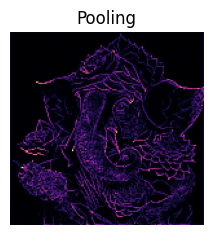

In [ ]:
# Define and apply the pooling operation
pool = tf.nn.pool
image_condense = pool(
    input=image_detect,
    window_shape=(2, 2),
    pooling_type='MAX',
    strides=(2, 2),
    padding='SAME',
)

# Plot the pooled image
plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()


The pooled image appears smaller but retains the key visual characteristics. Pooling effectively condenses the feature map, preserving the most dominant features (such as edges and textures) that the CNN will use for classification.

**Experimental Implementation: CNN Model for Handwritten Digit Recognition Using the MNIST Dataset**

To demonstrate how Convolutional Neural Networks operate in practice, we implemented a simple CNN model using the MNIST handwritten digits dataset. We used Keras, a high-level deep learning library in Python (via tensorflow.keras), to build and train the model.
The goal of this experiment is to recognize handwritten digits automatically from image data

**Data Manipulation**

In [ ]:
# Import necessary libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display dataset shapes
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training set shape: (60000, 28, 28)
Testing set shape: (10000, 28, 28)


In [ ]:
# Reshape data to fit CNN input format (samples, height, width, channels)
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0


In [ ]:
# One-hot encode target labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Encoded label shape:", y_train.shape)


Encoded label shape: (60000, 10)


**Data Preview**

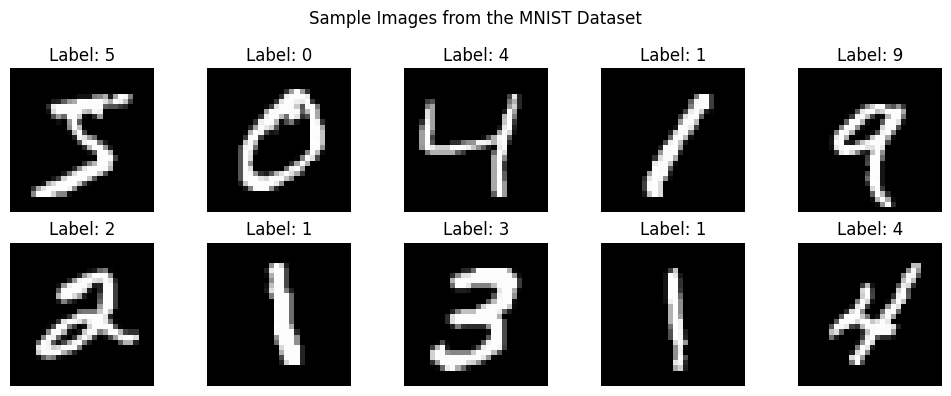

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.suptitle('Sample Images from the MNIST Dataset')
plt.show()


**CNN Architecture**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Training Model**

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 97ms/step - accuracy: 0.7901 - loss: 0.6853 - val_accuracy: 0.9832 - val_loss: 0.0593
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 99ms/step - accuracy: 0.9666 - loss: 0.1087 - val_accuracy: 0.9868 - val_loss: 0.0447
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 95ms/step - accuracy: 0.9769 - loss: 0.0800 - val_accuracy: 0.9892 - val_loss: 0.0408
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9817 - loss: 0.0605 - val_accuracy: 0.9898 - val_loss: 0.0353
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.9853 - loss: 0.0492 - val_accuracy: 0.9910 - val_loss: 0.0324


**Evaluation**

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


Test Accuracy: 99.07%


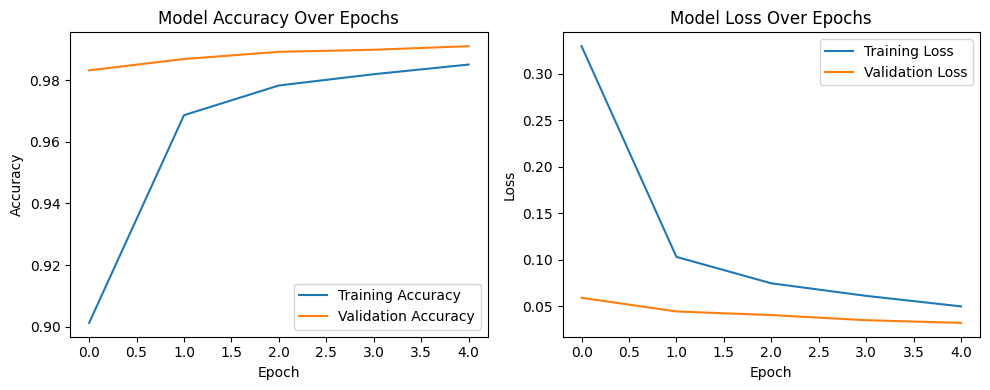

In [ ]:
plt.figure(figsize=(10, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


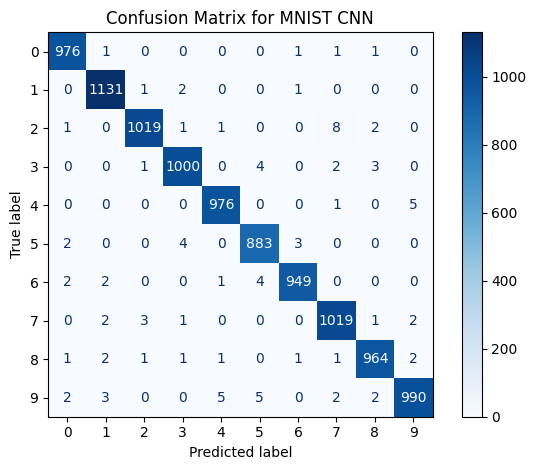

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict classes for test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title('Confusion Matrix for MNIST CNN')
plt.show()


**Predictions**

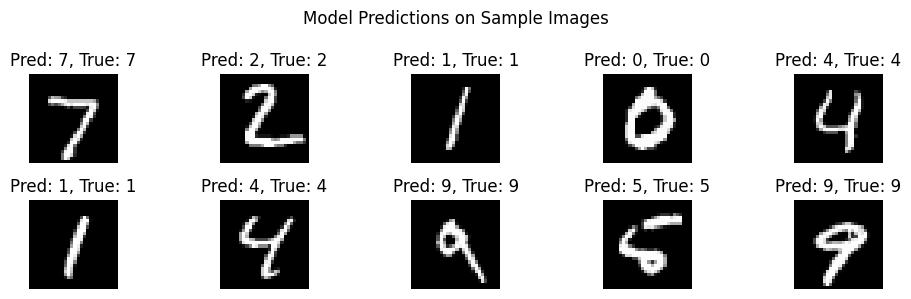

In [ ]:
# Display a few predictions
plt.figure(figsize=(10, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred_classes[i]}, True: {y_true[i]}")
    plt.axis('off')
print()
plt.suptitle('Model Predictions on Sample Images')
plt.show()
